# S06 T01 Sampling
Muestreo de información deportiva


In [67]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
df = pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False


In [69]:
pop = df.shape[0]
pop

42428

In [70]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [71]:
df['date'] = pd.to_datetime(df['date'])
df


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False


In [72]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

## Excercici 1
Generar una muestra aleatoria simple

In [73]:
# Suponiendo que el dataset completo es la población completa, tenemos una población de 42428 elementos. 
# Para calcular el tamaño de la muestra que necesitamos debemos elegir un nivel de confianza y un nivel de error esperado
# En el caso de nivel de confianza 95% y error 5% la muestra debe ser de 381 elementos. 
# Si aumentamos a 98% y 3% de error sube a 1457. Elijo esta opción.

sample_size = 1457


### Muestra aleatoria simple

In [74]:
sample_df = df.sample(sample_size)
sample_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
28131,2006-01-30,Bahrain,Syria,1,1,Friendly,Manama,Bahrain,False
4857,1960-11-27,Curaçao,Suriname,0,0,FIFA World Cup qualification,Willemstad,Netherlands Antilles,True
35404,2013-08-14,Algeria,Guinea,2,2,Friendly,Blida,Algeria,False
22124,1999-06-29,Gibraltar,Jersey,1,5,Island Games,Fardhem,Sweden,True
25245,2002-12-19,Vietnam,Philippines,4,1,AFF Championship,Jakarta,Indonesia,True
...,...,...,...,...,...,...,...,...,...
12851,1983-11-14,Niger,Mali,1,1,Friendly,Niamey,Niger,False
29862,2007-12-02,Guinea-Bissau,Sierra Leone,2,0,Amílcar Cabral Cup,Bissau,Guinea-Bissau,False
21558,1998-09-12,Fiji,Solomon Islands,1,1,Oceania Nations Cup qualification,Luganville,Vanuatu,True
42007,2021-03-26,Eswatini,Guinea-Bissau,1,3,African Cup of Nations qualification,Manzini,Eswatini,False


In [75]:
# Si quiero poder repetir exactamente los mismos valores uso una semilla en el random
sample_df = df.sample(sample_size, random_state = 4)
sample_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12509,1983-03-22,Ethiopia,Kenya,0,0,Friendly,Addis Abeba,Ethiopia,False
25607,2003-06-07,Niger,Guinea,1,0,African Cup of Nations qualification,Niamey,Niger,False
20892,1997-10-11,Cyprus,Luxembourg,2,0,FIFA World Cup qualification,Limassol,Cyprus,False
28709,2006-10-07,Namibia,Ethiopia,1,0,African Cup of Nations qualification,Windhoek,Namibia,False
13055,1984-05-19,Réunion,Tanzania,1,1,Friendly,Saint-Pierre,Réunion,False
...,...,...,...,...,...,...,...,...,...
38945,2017-06-10,Székely Land,Abkhazia,3,1,CONIFA European Football Cup,Kyrenia,Northern Cyprus,True
31074,2009-01-30,Honduras,Panama,0,1,UNCAF Cup,Tegucigalpa,Honduras,False
30143,2008-04-30,Colombia,Venezuela,5,2,Friendly,Bucaramanga,Colombia,False
37434,2015-10-11,Malawi,Tanzania,1,0,FIFA World Cup qualification,Blantyre,Malawi,False


### Muestra sistemática

In [76]:
#make this example reproducible
np.random.seed(0)

# calculate the step
step = int(pop / sample_size)
step

29

In [77]:
start = np.random.randint(step)
start

12

In [78]:
sys_sample_df = df.iloc[start::step]

# obtenemos algunos elementos de más porque step no era un número entero
sys_sample_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False
41,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False
70,1890-03-15,Wales,England,1,3,British Championship,Wrexham,Wales,False
99,1895-03-18,England,Wales,1,1,British Championship,London,England,False
128,1900-02-24,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False
...,...,...,...,...,...,...,...,...,...
42294,2021-06-11,DR Congo,Mali,1,1,Friendly,Radès,Tunisia,True
42323,2021-06-15,Philippines,Maldives,1,1,FIFA World Cup qualification,Suzhou,China PR,True
42352,2021-06-17,Algeria,Liberia,5,1,Friendly,Oran,Algeria,False
42381,2021-06-23,Ecuador,Peru,2,2,Copa América,Goiânia,Brazil,True


## Exercici 2
### Muestra estratificada

In [79]:
# Debo elegir cual será la variable por la que quiero agrupar la población
# Si me interesa que todos los años estén representados equitativamente

In [80]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True,2021
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False,2021
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True,2021
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False,2021


In [81]:
pd.unique(df['year'].values).size

150

In [82]:
# Son demasiados años, pruebo con la década
df['decade'] = df['year'] // 10 *10
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1870
...,...,...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True,2021,2020
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False,2021,2020
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True,2021,2020
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False,2021,2020


In [83]:
pd.unique(df['decade'].values).size

16

<AxesSubplot:xlabel='decade', ylabel='count'>

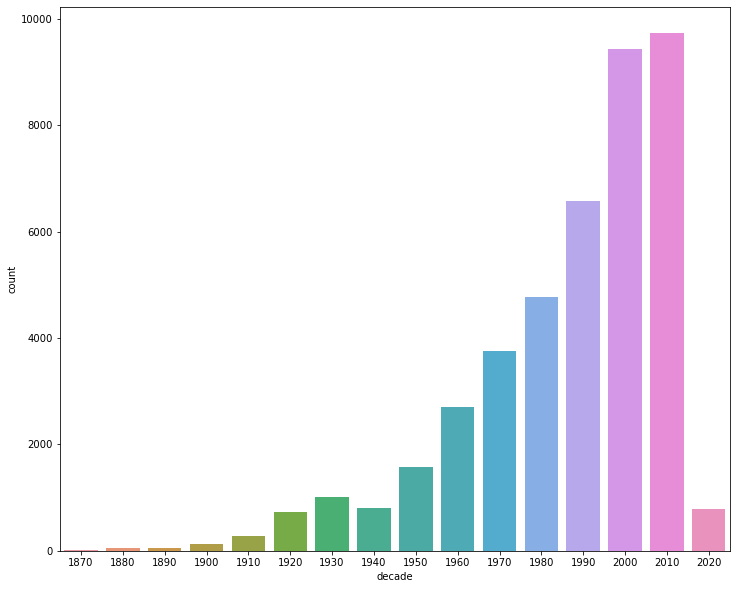

In [84]:
plt.figure(figsize=(12,10))
sns.countplot(x="decade", data=df, orient = 'v')

<AxesSubplot:ylabel='decade'>

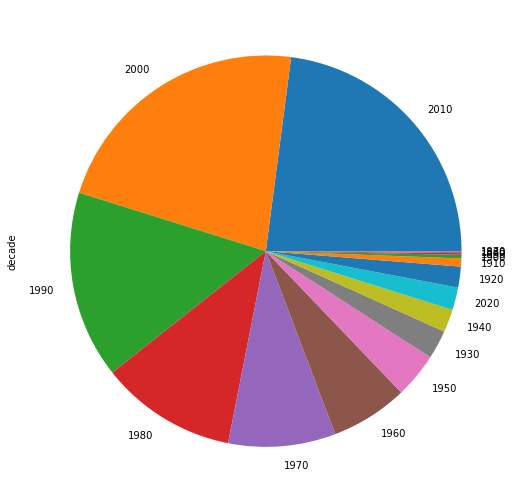

In [85]:
    counts = df.decade.value_counts()
    # use a pie plot
    counts.plot(kind='pie', y=df.decade, figsize =(9, 9))

In [86]:
strat = pd.unique(df['decade'].values)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df, df.decade, stratify = df.decade,
                                                    train_size = sample_size, random_state = 8)

In [88]:
# El dataframe X_train tiene la misma forma gráfica del df original, porque se mantienen las proporciones
X_train


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,decade
8554,1973-04-22,DR Congo,Burkina Faso,4,1,African Cup of Nations qualification,Kinshasa,Zaïre,False,1973,1970
21234,1998-04-22,Iran,Jamaica,1,0,Friendly,Teheran,Iran,False,1998,1990
21998,1999-06-03,Trinidad and Tobago,Jamaica,1,0,CFU Caribbean Cup,Port of Spain,Trinidad and Tobago,False,1999,1990
5145,1962-06-02,Brazil,Czechoslovakia,0,0,FIFA World Cup,Viña del Mar,Chile,True,1962,1960
21934,1999-04-24,Pakistan,Bangladesh,0,4,SAFF Cup,Margao,India,True,1999,1990
...,...,...,...,...,...,...,...,...,...,...,...
17799,1993-06-13,Hong Kong,India,1,3,FIFA World Cup qualification,Seoul,South Korea,True,1993,1990
24631,2002-02-13,Belgium,Norway,1,0,Friendly,Brussels,Belgium,False,2002,2000
4272,1957-10-05,Northern Ireland,Scotland,1,1,British Championship,Belfast,Northern Ireland,False,1957,1950
14282,1986-07-27,Nigeria,Togo,2,2,Friendly,Monrovia,Liberia,True,1986,1980


<AxesSubplot:xlabel='decade', ylabel='count'>

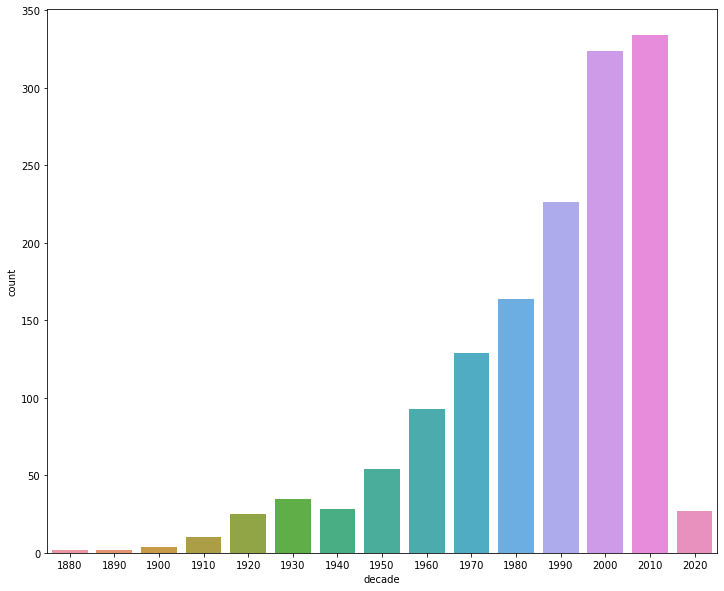

In [90]:
plt.figure(figsize = (12,10))
sns.countplot(x="decade", data=X_train)

<AxesSubplot:ylabel='decade'>

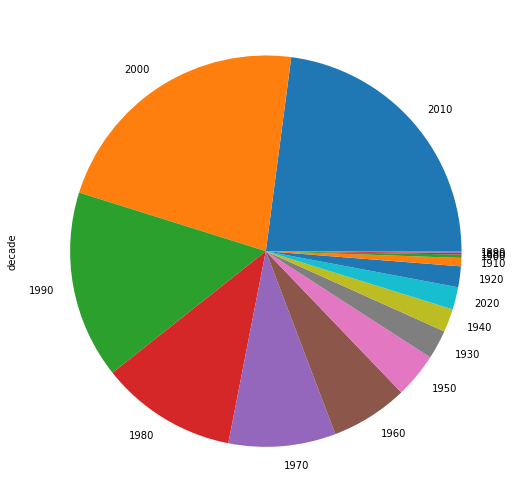

In [91]:
    counts = X_train.decade.value_counts()
    # use a pie plot
    counts.plot(kind='pie', y=X_train.decade, figsize =(9, 9))

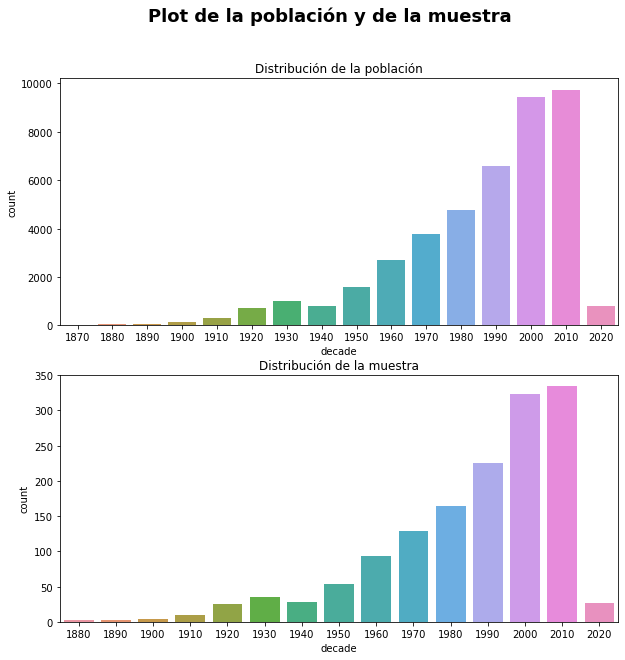

In [92]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
#first subplot
ax1 = plt.subplot(2, 1, 1)
sns.countplot(x="decade", data=df)
plt.title("Distribución de la población")
# second subplot
ax2 = plt.subplot(2, 1, 2)
sns.countplot(x="decade", data=X_train)
plt.title("Distribución de la muestra")
fig.suptitle('Plot de la población y de la muestra', fontsize=18, weight = 'bold')
plt.show()



### Muestreo con SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
pd.unique(df['neutral'].values).size

2

<AxesSubplot:ylabel='neutral'>

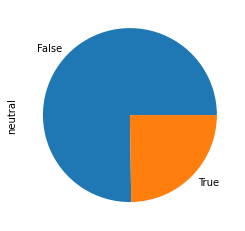

In [95]:
    # La variable neutral tiene sólo 2 valores y están desbalanceados
    counts = df.neutral.value_counts()
    # use a pie plot
    counts.plot(kind='pie', y=df.neutral)

In [96]:
smote = SMOTE(random_state=1, sampling_strategy = 'minority')

# Quiero agregar al df nuevos valores donde neutral sea True 
X = df.drop(['date','home_team','away_team','tournament','city','country'], axis=1)
# Uso la variable neutral 
y = df['neutral']

X_sm, y_sm = smote.fit_resample(X, y)

X_sm

,home_score,away_score,neutral,year,decade
0,0,0,False,1872,1870
1,4,2,False,1873,1870
2,2,1,False,1874,1870
3,2,2,False,1875,1870
4,3,0,False,1876,1870
...,...,...,...,...,...
63837,0,2,True,2002,2000
63838,1,1,True,1958,1950
63839,2,1,True,1981,1980
63840,2,2,True,2001,2000


<AxesSubplot:ylabel='neutral'>

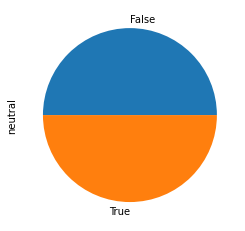

In [97]:
    # Cómo queda la distribución del nuevo dataset?
    counts = X_sm.neutral.value_counts()
    # use a pie plot
    counts.plot(kind='pie', y=X_sm.neutral)

## Exercici 3
Crear una muestra con Reservoir Sampling:
La idea de este método es que tenemos un ingreso infinito de valores y tenemos que elegir una muestra
Para simularlo con mi sataset voy a hacer un generador que lea por línea de mi archivo csv. 
Obviamente, el archivo tiene un fin, pero vamos a suponer que no.

Elijo un número arbitrario de elementos en la muestra porque el tamaño es infinito.
Cada elemento tiene la misma probabilidad de ser elegido

In [98]:
# abro el archivo de datos
ff = open("results.csv", "r")
import random
random.seed(30)

In [99]:
# Reservoir Sampling
sample_size = 5
reservoir = []
i = 0
for r in range(100):
    element = ff.readline()
    if i+1<= sample_size:
        reservoir.append(element)
    else:
        probability = sample_size/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,sample_size))] = element
    i = i + 1

reservoir

['1887-02-05,England,Northern Ireland,7,0,British Championship,Sheffield,England,FALSE\n',
 '1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,FALSE\n',
 '1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,FALSE\n',
 '1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,FALSE\n',
 '1892-03-19,Northern Ireland,Scotland,2,3,British Championship,Belfast,Republic of Ireland,FALSE\n']